Problem Statement:

Given the train and test csv files predict who are the most likely survivors
    
    The main goal of this notebook is to try to present a complete approach to modeling problems, that goes from Exploratory Data Analysis to applying Supervised and Unsupervised learning techniques to our data.
    
    Titanic Dataset: Automatic EDA, different Data Preprocessing & Modeling Techniques compared with Pipelines + RandomSearchCV 

###### 1. Import libraries

In [1]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.stats.weightstats import ztest

import plotly.graph_objs as go
import plotly.express as px

from itertools import cycle
import autoviz
from autoviz.AutoViz_Class import AutoViz_Class
from IPython.display import display

import ppscore as pps

Imported AutoViz_Class version: 0.0.74. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
ALERT: verbose=2 saves plots in local disk under AutoViz_Plots dir and does not display charts anymore


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import plotly.tools as tls
import plotly.offline as py
import missingno as msno

import cufflinks as cf

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import  RadiusNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from sklearn.linear_model import RidgeClassifier
from catboost import Pool, CatBoostClassifier, cv
import lightgbm as lgb
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import random

###### 2. Import Dataset and descriptive analysis

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [8]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


From the data above, train['Survived'] is dependant variable which has to be predicted.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we see there are some missing values in the data, lets look at the missing data

In [10]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age is missing 177 values and cabin is missing 687 values

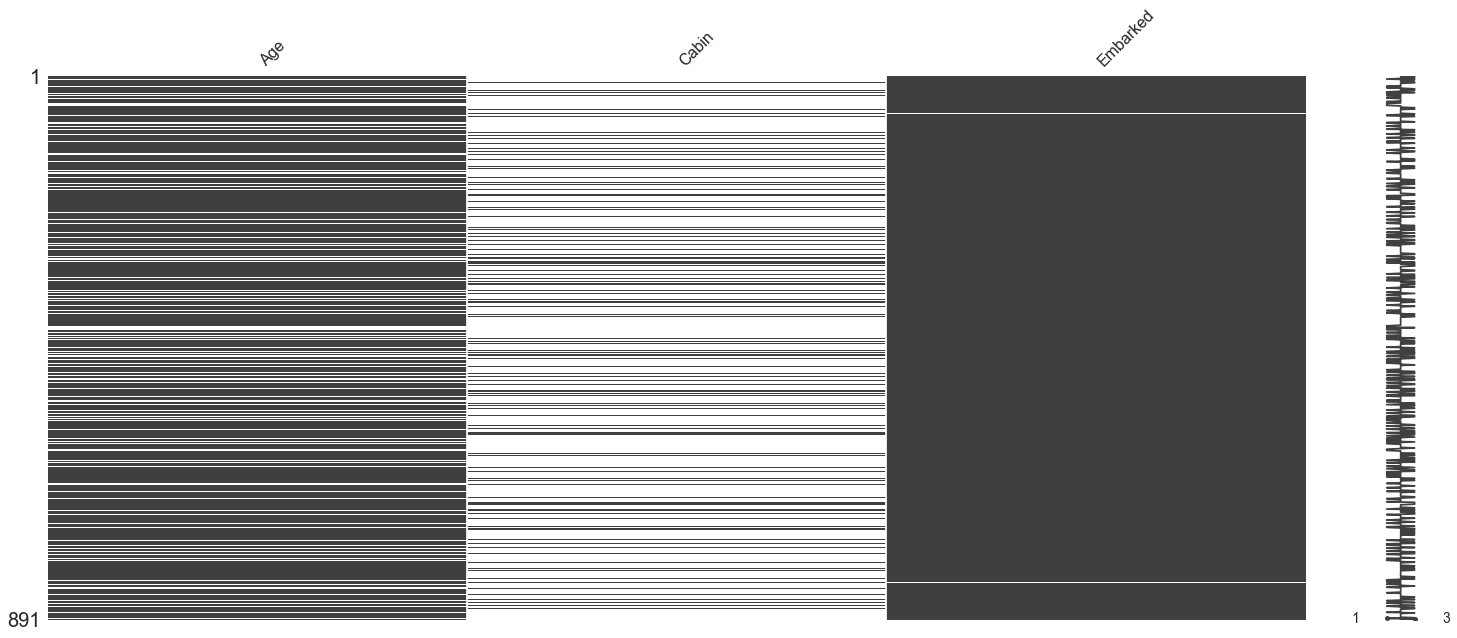

In [11]:
import matplotlib
%matplotlib inline
msno.matrix(train[["Age","Cabin","Embarked"]])

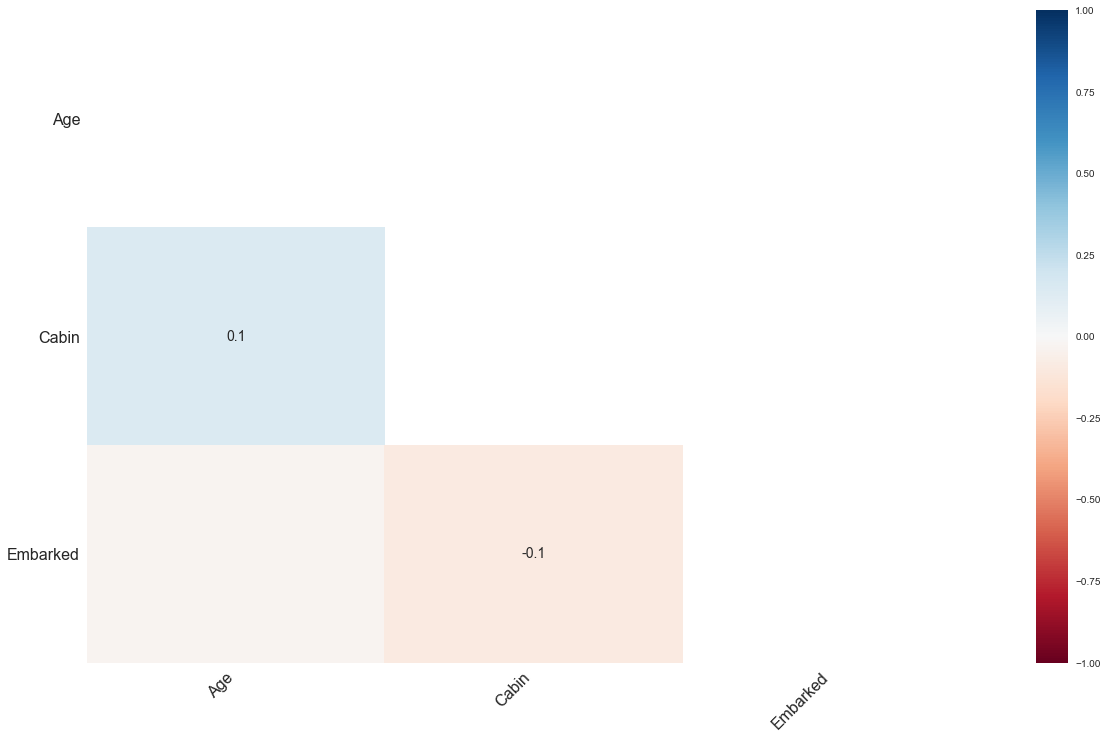

In [12]:
msno.heatmap(train[["Age", "Cabin", "Embarked"]])

In [13]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Let us visualize the data via Autoviz library to understand the variables in the data

Shape of your Data Set: (891, 12)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
        4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Could not draw Heat Map
Time to run AutoViz (in seconds) = 1.198


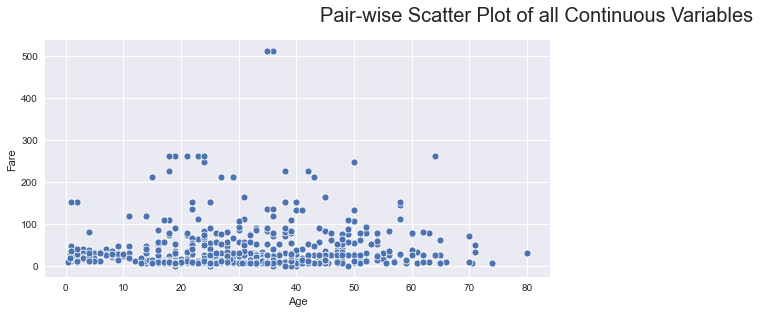

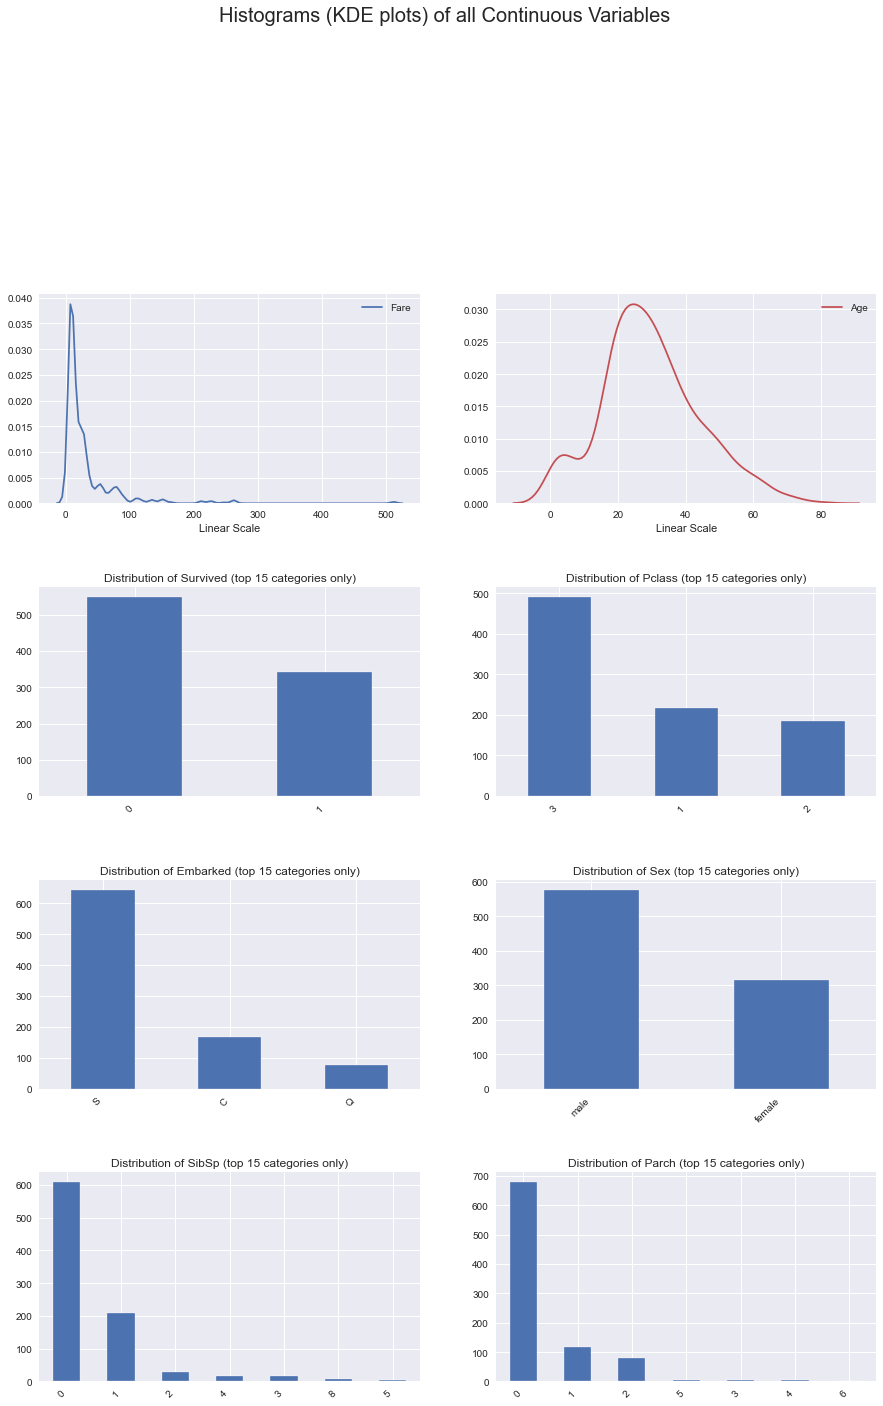

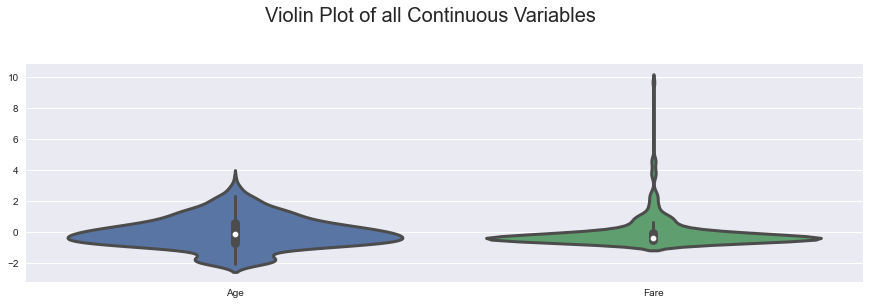

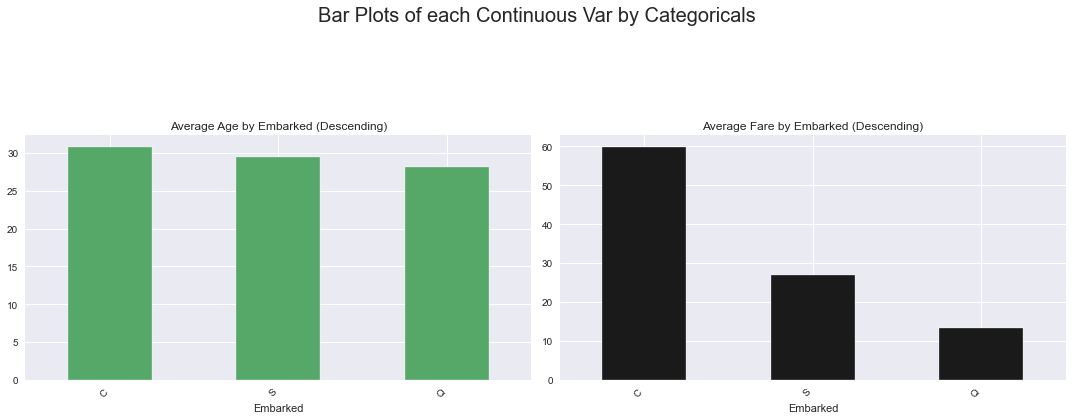

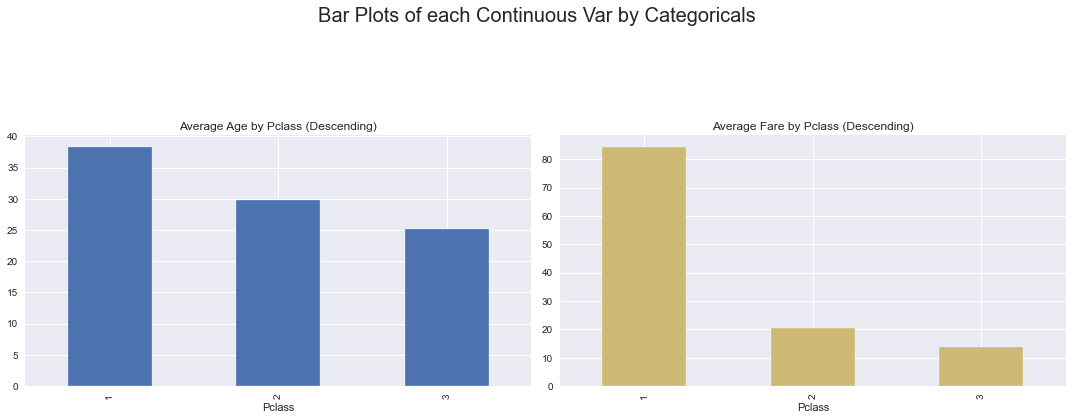

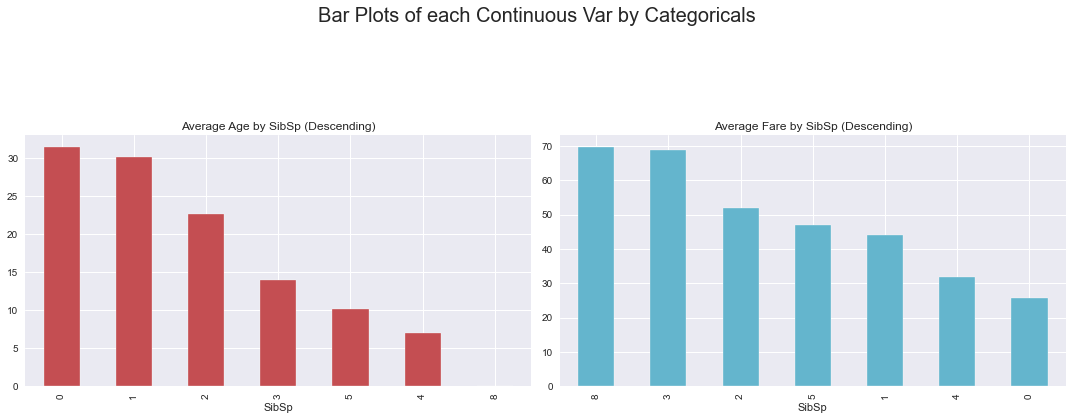

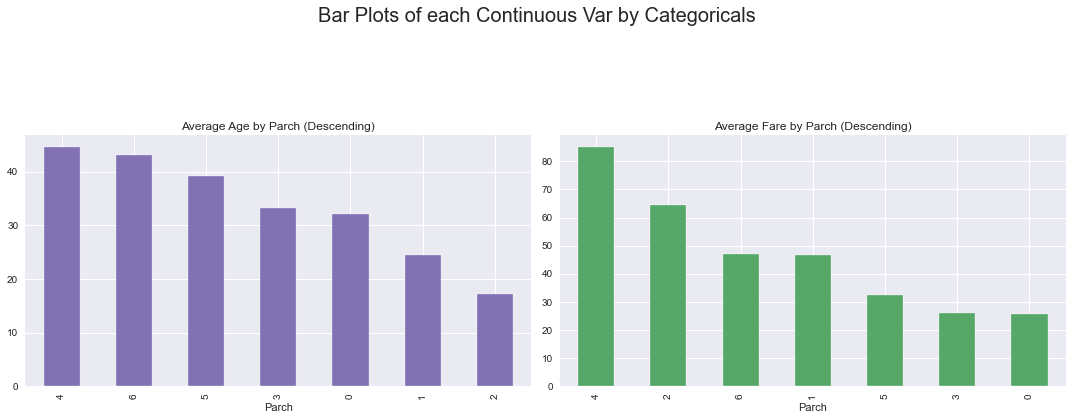

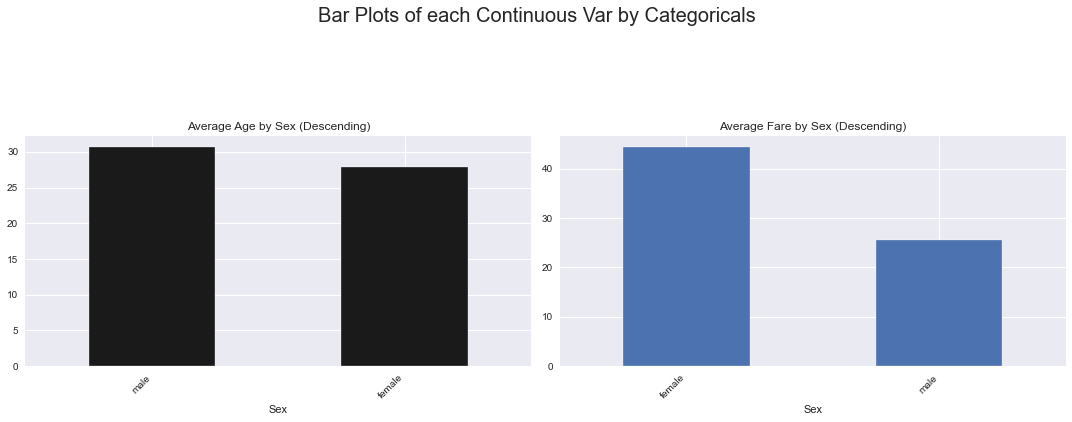

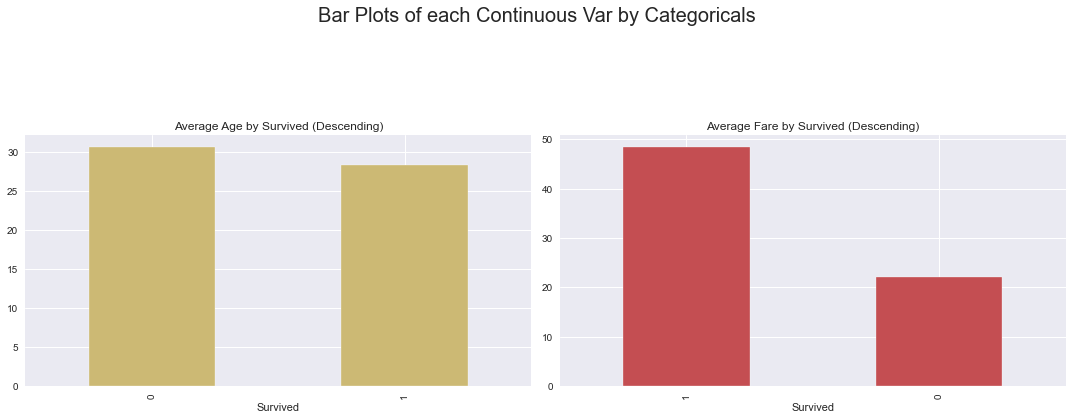

In [14]:
AV = AutoViz_Class()
report1 = AV.AutoViz('train.csv')

Likewise we also have another library sweetviz that can also be used to automate EDA to understand our data

In [15]:
from pandas_profiling import ProfileReport
report2 = ProfileReport(train) #dataframe
report2.to_file(output_file='titanic_report.html')
display(report2)

In [16]:
import sweetviz as sv
report3 = sv.analyze(train)
report3.show_html('titanic_report2.html')


Report titanic_report2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.




Using the power of both automatic EDA libraries listed above, we can observe each variable's behaviour individually, with plots that goes from Histograms to Boxplots, Correlation Matrix and much more. It speeds up time and minimizes the effort spent on the initial process of our work.

We can gather some really useful information from both reports. Let's now point some of them out:

    Our classes are not that much disbalanced. We have ~38% of the passengers into class "1" (survived) and ~62% of the passengers into class "0" (didn't survive).

    The "Pclass" column, that informs us about the passenger's ticket class, shows us that ~55% of them are on class 3, ~24% of them are on class 2 and ~21% on class 1.

    Most of the passengers into this dataset are male: ~35% of the passengers are female, and ~65% are male.

    Almost 20% of the values in the "Age" column are missing. We can fill out these nulls with various techniques, such as filling them with the distribution's mean. The ages distribution is a little bit skewed, with it's mean being around 30 years old, and it's standard deviation being close to 15. The oldest passenger we have in this dataset is 80 years old.

    According to the "SibSP" column, most of the passengers (~68%) didn't have any spouses or siblings aboard the ship. That is also applied when we check out the "Parch" column.

    The distribution of Fares is much more skewed. It's mean value is around 32, with it's standard deviation being close to 50. It's minimum value is 0, and it's maximum value is 512.3292. That means that we're going to have to deal with this column carefully if we plan to use models such as SVMs.

    When ckecking the "Embarked" column, it shows us that 72.3% of the passengers embarked at Southampton port, 18.9% of the passengers at Cherbourg port and 8.6% of the passengers at Queenstown port.

    "Fare" values are higher for passengers with "Pclass" = 1, lower for passengers with "Pclass" = 2 and even lower for passengers with "Pclass" = 3. Logically, it looks like the classification of "Pclass" is defined by the value of the passenger's fare.




More Exploration

Before we go to the modeling part, let's take a look at a few more plots that gives us a different perspective from the ones generated above. That may give us further insights and help us understand the differences between the passengers that survived the catastrophe and the people that didn't. For these visualizations, we are going to use Plotly, a library that gives us beautiful plots and allows us to interact with them.

First, let's take a look at the differences between the ages of both groups, using a Violin plot.


In [17]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [18]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
train.skew().sort_values()

Pclass        -0.630548
PassengerId    0.000000
Age            0.389108
Survived       0.478523
Parch          2.749117
SibSp          3.695352
Fare           4.787317
dtype: float64

In [20]:
train.kurt().sort_values()

Survived       -1.775005
Pclass         -1.280015
PassengerId    -1.200000
Age             0.178274
Parch           9.778125
SibSp          17.880420
Fare           33.398141
dtype: float64

###### Univariate Analysis

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Lets look at how our data is distributed

0    549
1    342
Name: Survived, dtype: int64


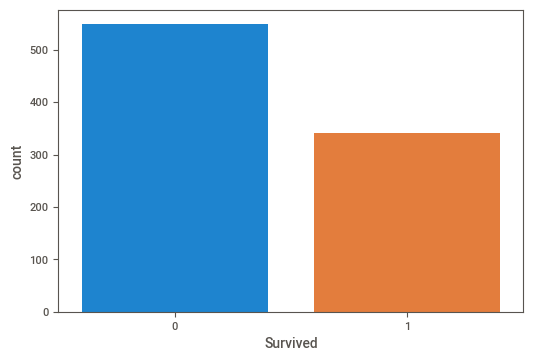

In [23]:
print(train.Survived.value_counts())
sns.countplot(train.Survived)

So we see that 549 people did not survive. 342 people survived.

3    491
1    216
2    184
Name: Pclass, dtype: int64


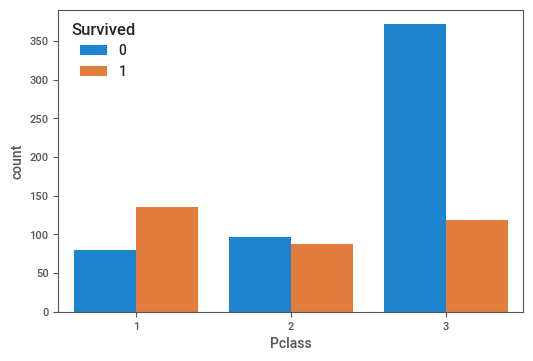

In [24]:
print(train.Pclass.value_counts())

sns.countplot(train.Pclass, hue=train.Survived)

From this plot, we notice that most of the nonsurvivors belong to Pclass 3. while more than 50% of them didnot survive in Pclass 2, Also,60% of Pclass members did not survive

male      577
female    314
Name: Sex, dtype: int64


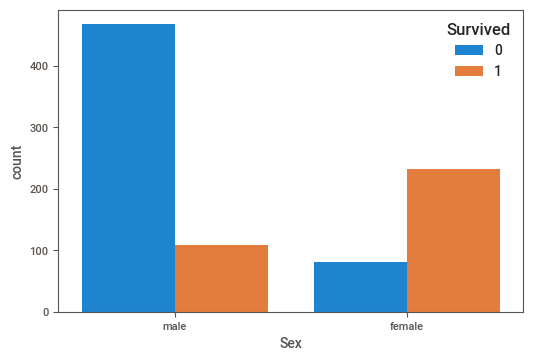

In [25]:
print(train.Sex.value_counts())

sns.countplot(train.Sex, hue=train.Survived)

There were 577 males and 314 females onboard. But roughly 100+ males survived. While others didnot.
and 220+ females survived and roughly 100 females didnt survive

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


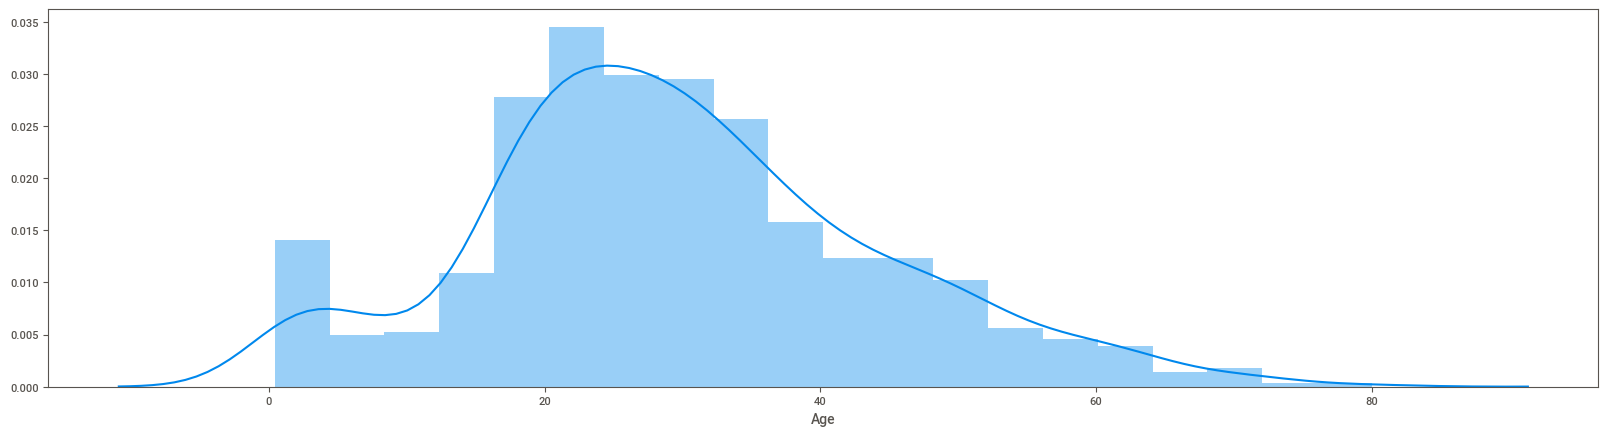

AxesSubplot(0.125,0.125;0.775x0.755)


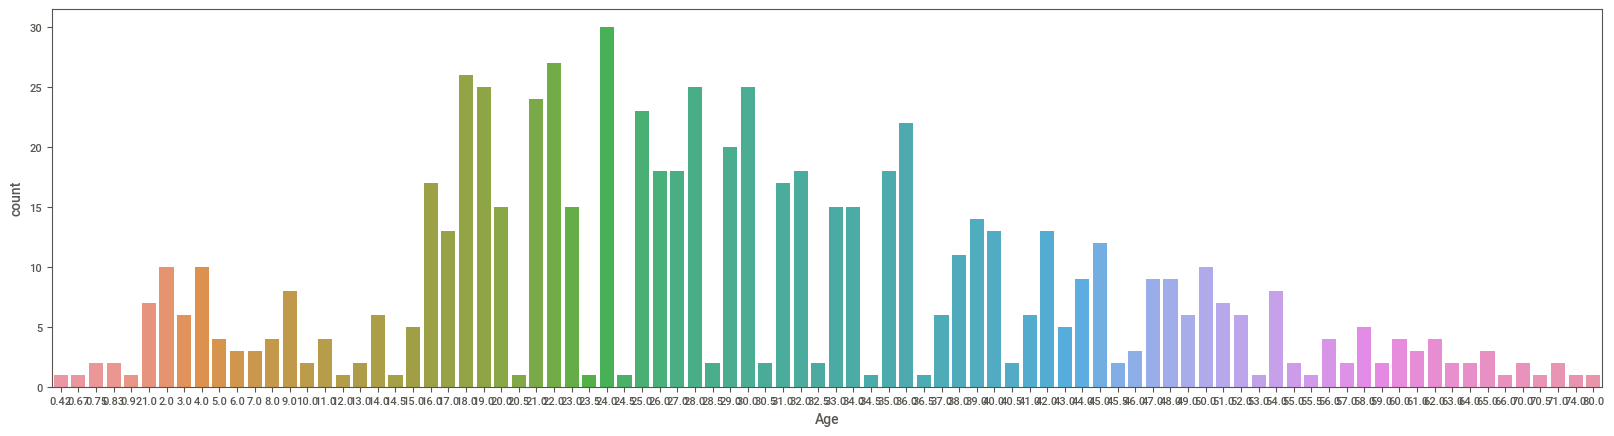

AxesSubplot(0.125,0.125;0.775x0.755)


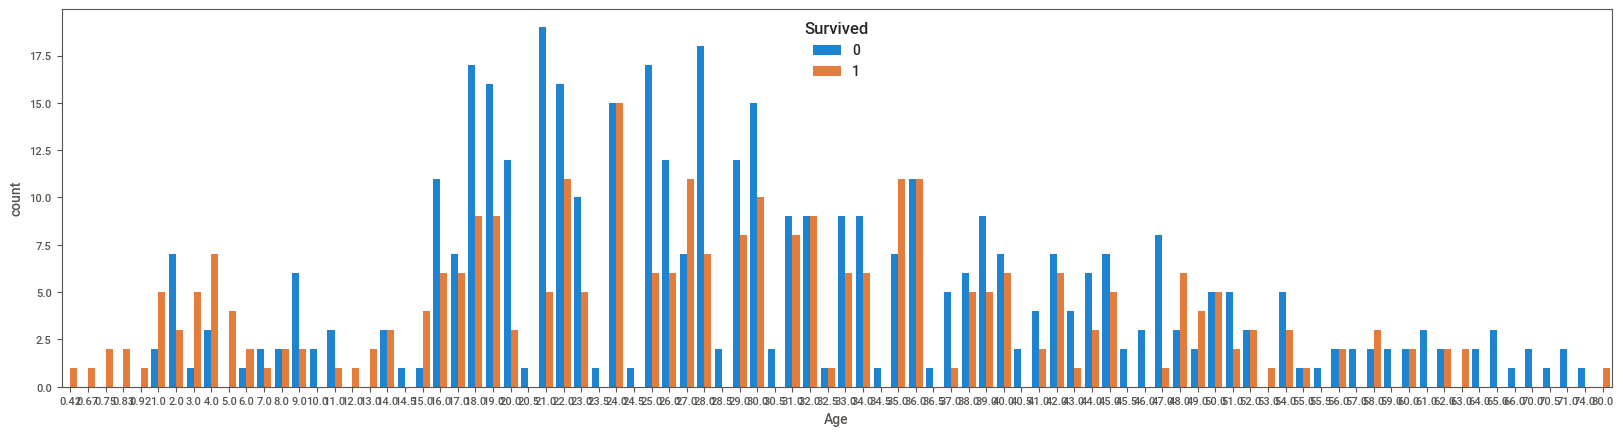

In [26]:
print(train.Age.value_counts())
plt.figure(figsize=(20,5))
print(sns.distplot(train.Age))
plt.show()
plt.figure(figsize=(20,5))
print(sns.countplot(train.Age))
plt.show()
plt.figure(figsize=(20,5))
print(sns.countplot(train.Age,  hue=train.Survived))
plt.show()

From the data there are people with many ages. and it is difficult to say from the plot who survived and who didnt. Let us segragate the different ages into 3 classes.
    
    a. young below 18
    b. adults between 18 and 50
    c. seniors 50 and above

In [27]:
train['Agecat'] = train['Age'].dropna().apply(lambda x : 'young' if x<19 else 'adults' if x<51 else 'seniors')

In [28]:
train['Agecat'].value_counts()

adults     511
young      139
seniors     64
Name: Agecat, dtype: int64

In [29]:
train[['Age', 'Agecat']]

Age  Agecat
0    22.0  adults
1    38.0  adults
2    26.0  adults
3    35.0  adults
4    35.0  adults
..    ...     ...
886  27.0  adults
887  19.0  adults
888   NaN     NaN
889  26.0  adults
890  32.0  adults

[891 rows x 2 columns]

Now we have categorized the data into 3 categories. Lets visualize

adults     511
young      139
seniors     64
Name: Agecat, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


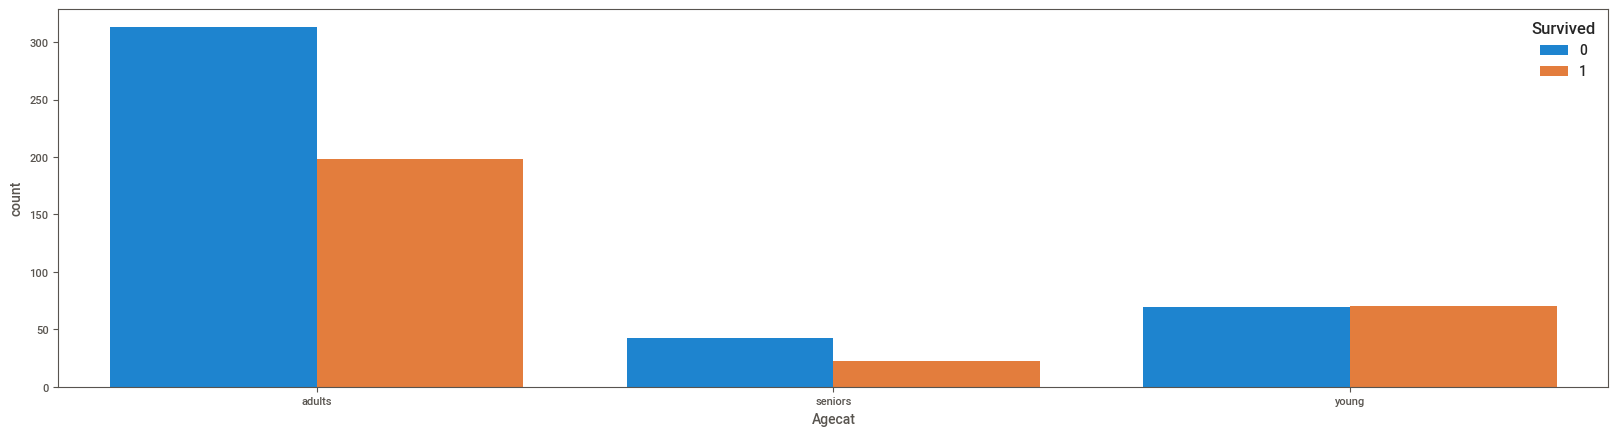

In [30]:
print(train.Agecat.value_counts())
plt.figure(figsize=(20,5))
print(sns.countplot(train.Agecat,  hue=train.Survived))


As we can see, majority of adults and seniors and 50% of young people did not make it

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


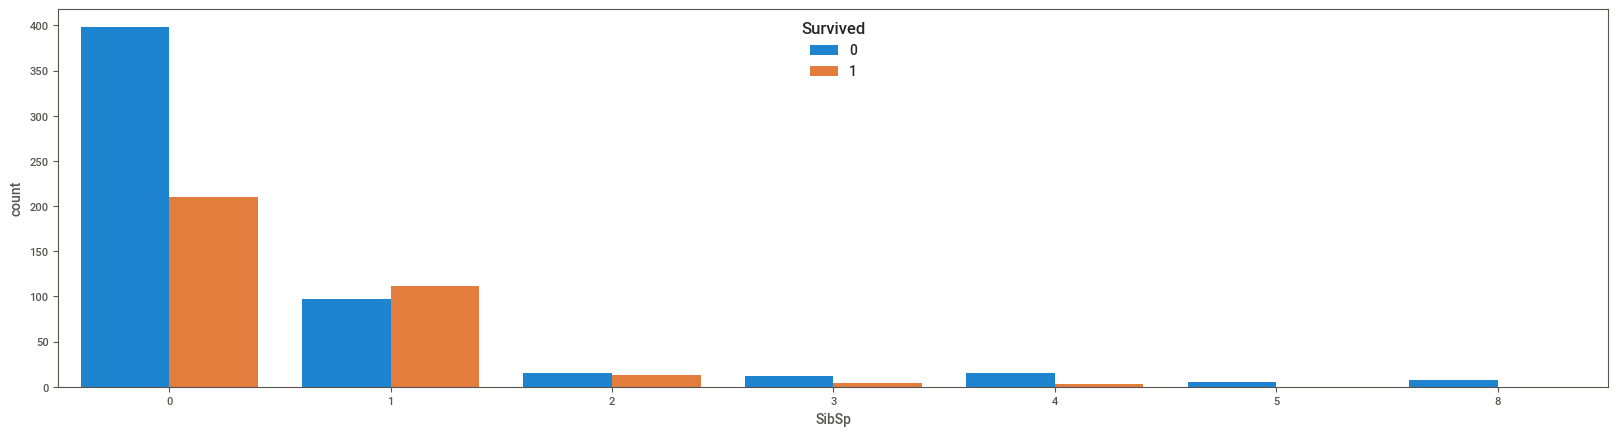

In [31]:
print(train.SibSp.value_counts())
plt.figure(figsize=(20,5))
sns.countplot(train.SibSp, hue=train.Survived)

From the plot, Majority of nonsurvivors were people with absolutely no family members on the ship. 

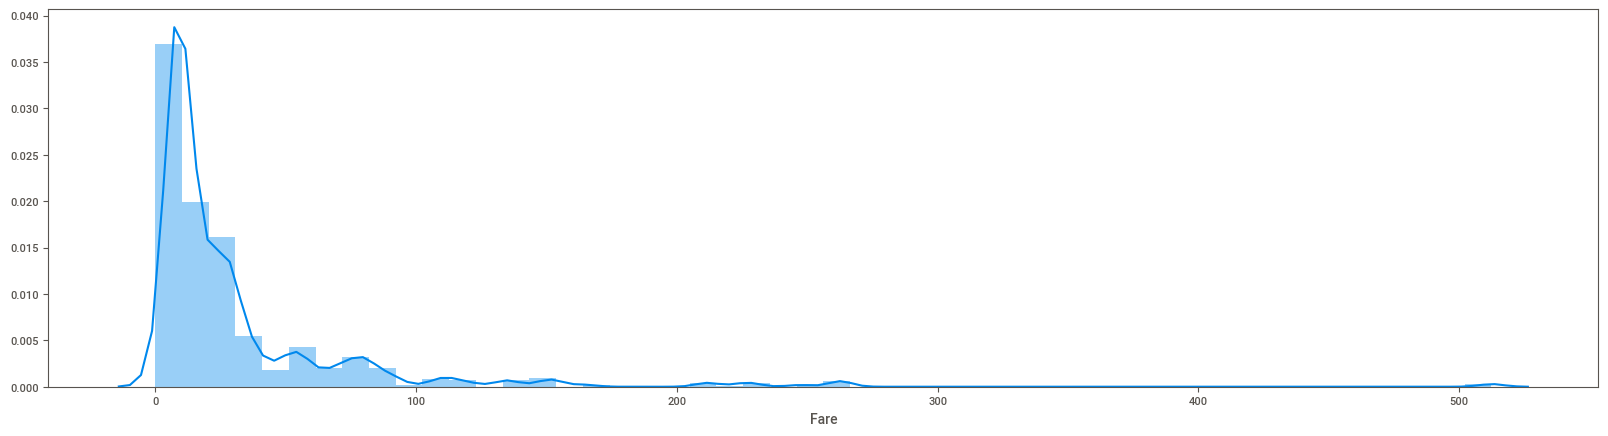

In [32]:
plt.figure(figsize=(20,5))
sns.distplot(train.Fare)

So from the data, majority of people paid less than 40$ as fare

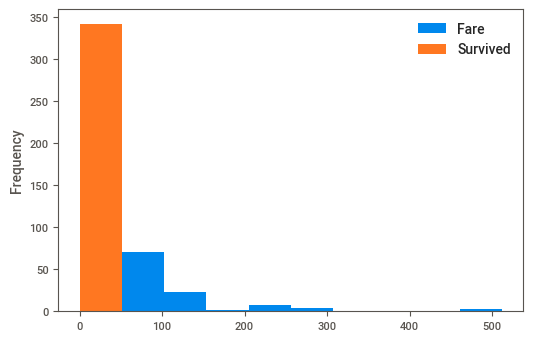

In [33]:
train[['Fare','Survived']][train.Survived==1].plot(kind='hist')

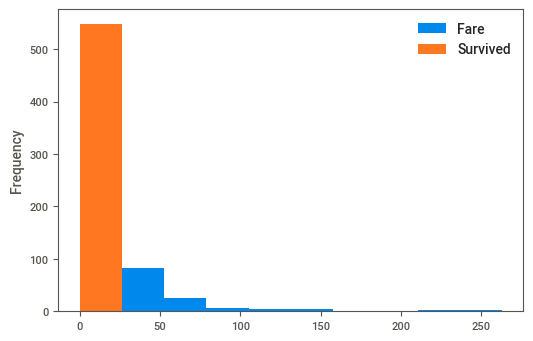

In [34]:
train[['Fare','Survived']][train.Survived==0].plot(kind='hist')

As we can see people who survived and people who didnt have no dependency on Fare they paid. people who paid low fares as well as high fares had same chances of survival more or less

The same observation is evident from this pairplot below.

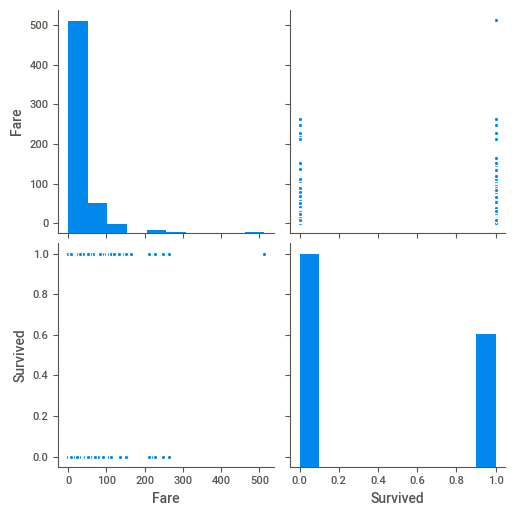

In [35]:
sns.pairplot(train[['Fare','Survived']])

S    644
C    168
Q     77
Name: Embarked, dtype: int64


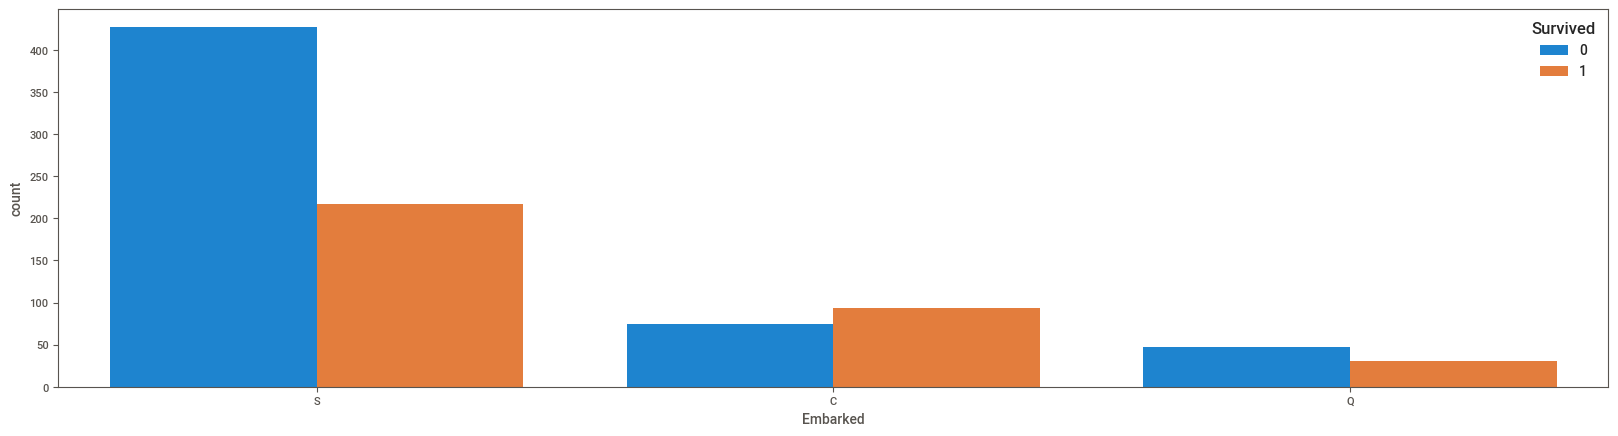

In [36]:
print(train.Embarked.value_counts())
plt.figure(figsize=(20,5))
sns.countplot(train.Embarked, hue=train.Survived)

In [37]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

So from the plot, we can say majority of nonsurvivors were from 'S' and some from the rest

So all the visualization and analysis from the above, person had better chances of survival if:
    1. They were boarded from 'C' or 'Q' 
    2. If they had family members on the ship
    3. If they were young
    4. if they were female
    5. If they were i Pclass 1 or 2

###### 4. Inferential Statistics

We shall plot a pirplot to observe the type of relationship the variables exhibit

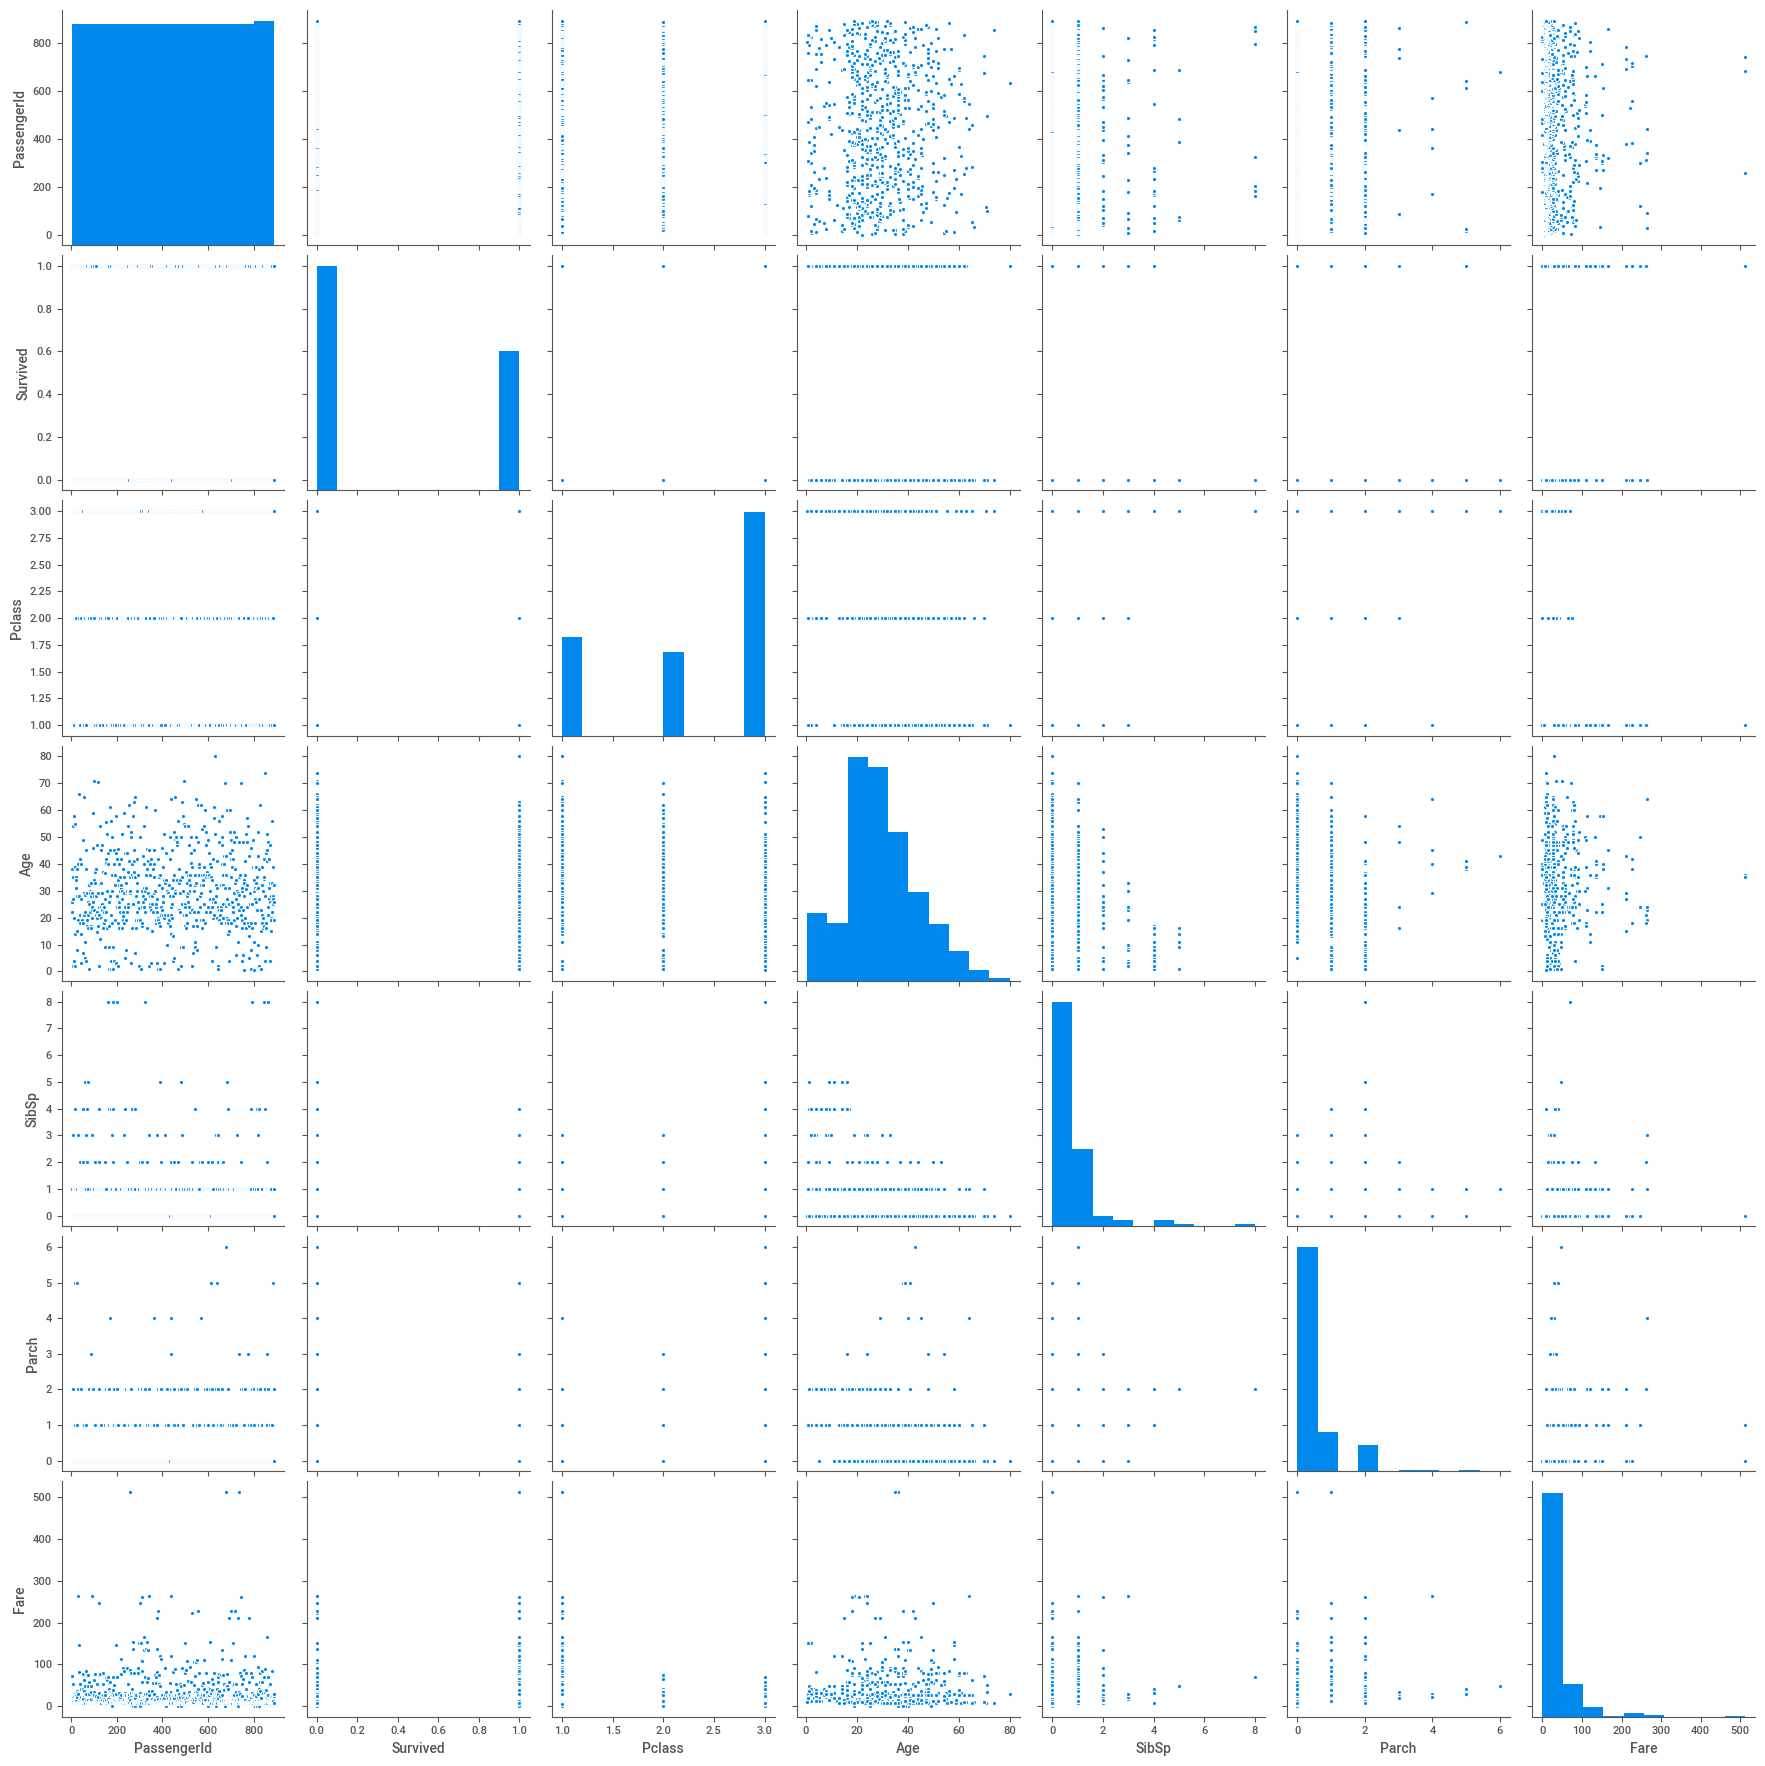

In [38]:
sns.pairplot(train)

From the plot, relationships are nonlinear. we can use a PPS (Predictive Power Score) matrix, to figure out non-linear relations between columns.

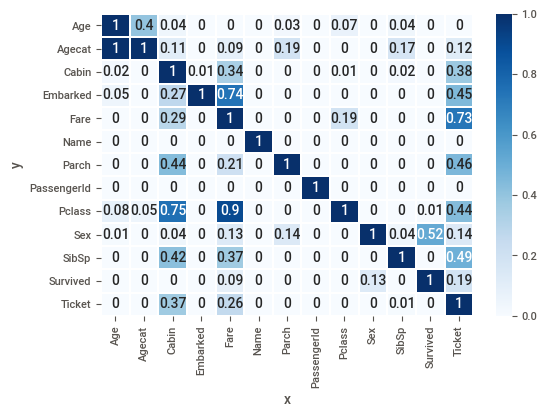

In [39]:
matrix_df = pps.matrix(train)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_df = matrix_df.apply(lambda x: round(x, 2)) # Rounding matrix_df's values to 0,XX

sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.75, annot=True)

Looking at this PPS matrix, we can see that the best univariate predictor of the Survived variable is the column Ticket, with 0.19 pps, followed by Sex, with 0.13 pps. That makes sense because women were prioritized during the rescue, and ticket is closely related to Pclass. The best univariate predictor of the Parch variable is the column Cabin, with 0.37 pps, and so on.

Lets look at few hypothesis and lets validate them

We want to find out if the ages of survivors vs ages of non survivors are statistically different

In [40]:
df_survived = train[train['Survived'] == 1]
df_nonsurvived = train[train['Survived'] == 0]

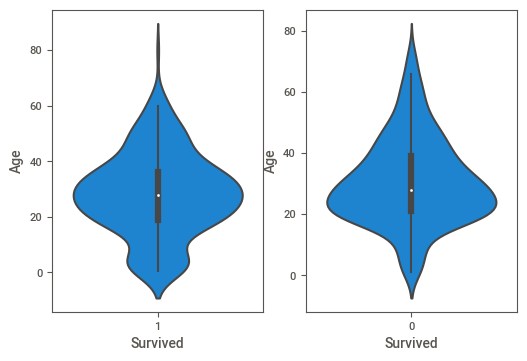

In [41]:
f, axes = plt.subplots(1,2)
sns.violinplot(y=df_survived['Age'], x=df_survived['Survived'], ax=axes[0])
sns.violinplot(y=df_nonsurvived['Age'], x=df_nonsurvived['Survived'], ax=axes[1])

Upon a glance, we see that means of both survived and nonsurvived seem to be same, but we need to validate that.

In [42]:
# First distribution for the hypothesis test: Ages of survivors
dist_a = df_survived['Age'].dropna()

# Second distribution for the hypothesis test: Ages of non-survivors
dist_b = df_nonsurvived['Age'].dropna()

In [43]:
# Z-test: Checking if the distribution means (ages of survivors vs ages of non-survivors) are statistically different
t_stat, p_value = ztest(dist_a, dist_b)

print("----- Z Test Results -----")
print("T stat. = " + str(t_stat))
print("P value = " + str(p_value)) # P-value is less than 0.05

print("")

# T-test: Checking if the distribution means (ages of survivors vs ages of non-survivors) are statistically different
t_stat_2, p_value_2 = stats.ttest_ind(dist_a, dist_b)

print("----- T Test Results -----")
print("T stat. = " + str(t_stat_2))
print("P value = " + str(p_value_2)) # P-value is less than 0.05

----- Z Test Results -----
T stat. = -2.06668694625381
P value = 0.03876366199189209

----- T Test Results -----
T stat. = -2.06668694625381
P value = 0.03912465401348249


As we can see both from the plot and hypothesis tests showed above, there is actually a statistically significant difference between the means of both distributions (ages of survivors and non-survivors). Let's do some more exploring to see what further information we can gather from this data.

In [44]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Agecat'],
      dtype='object')

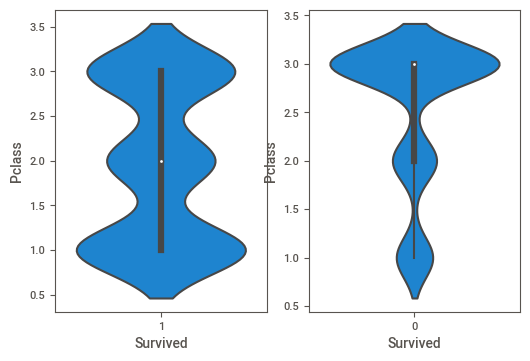

In [45]:
f, axes = plt.subplots(1,2)
sns.violinplot(y=df_survived['Pclass'], x=df_survived['Survived'], ax=axes[0])
sns.violinplot(y=df_nonsurvived['Pclass'], x=df_nonsurvived['Survived'], ax=axes[1])

As we see numbner of nonsurvivors belonged to Pclass 3.

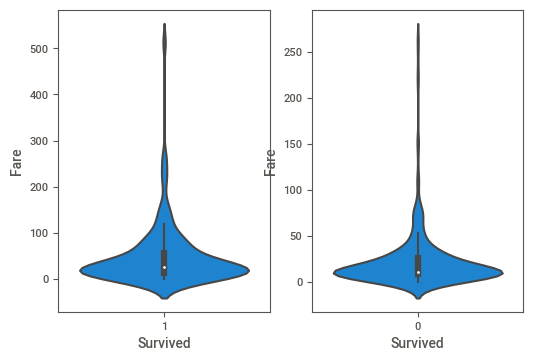

In [46]:
f, axes = plt.subplots(1,2)
sns.violinplot(y=df_survived['Fare'], x=df_survived['Survived'], ax=axes[0])
sns.violinplot(y=df_nonsurvived['Fare'], x=df_nonsurvived['Survived'], ax=axes[1])

Again It appears from the plot that both survivors and nonsurvivors had same distribution of fares. but lets validate that

In [47]:
# Third distribution for the hypothesis test - Fares of survivors
dist_c = df_survived['Fare'].dropna()

# Fourth distribution for the hypothesis test - Fares of non-survivors
dist_d = df_nonsurvived['Fare'].dropna()

In [48]:
# Z-test: Checking if the distribution means (fares of survivors vs fares of non-survivors) are statistically different
t_stat_3, p_value_3 = ztest(dist_c, dist_d)
print("----- Z Test Results -----")
print("T stat. = " + str(t_stat_3))
print("P value = " + str(p_value_3)) # P-value is less than 0.05

print("")

# T-test: Checking if the distribution means (fares of survivors vs fares of non-survivors) are statistically different
t_stat_4, p_value_4 = stats.ttest_ind(dist_c, dist_d)
print("----- T Test Results -----")
print("T stat. = " + str(t_stat_4))
print("P value = " + str(p_value_4)) # P-value is less than 0.05

----- Z Test Results -----
T stat. = 7.939191660871055
P value = 2.035031103573989e-15

----- T Test Results -----
T stat. = 7.939191660871055
P value = 6.120189341924198e-15


Checking out the plots and hypothesis tests over fare distributions, comparing Survivors and non-Survivors, we can again observe that there is a statistically significant difference between the means of both groups.

When checking out the boxplots, we can see that fare values of survivors are generally higher, when compared to fare values of non-survivors

###### 5. Supervised Learning - Classification

In [49]:
import collections
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import StratifiedShuffleSplit, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import SelectPercentile, SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb
from lightgbm import LGBMClassifier, plot_importance as plot_importance_lgbm

###### Feature Engineering

In [50]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Agecat  
0      0         A/5 21171   7.2500   NaN        S  adults  
1      0          PC 17599  71.2833   C85        C  adults  
2      0  STON/O2. 3101282   7.9250   NaN        S  adults  
3      0            113803  53.1000  C123        S  adults  
4      0            373450   8.0500   NaN        S  adults

Let us create some features from our data to do the ML modeling

Let us create family size for SibSp

In [51]:
train['FamilySize'] = train['SibSp'].dropna().apply(lambda x: 'small' if x<=2 else 'medium' if x<=4 else 'big')

Create categorical variable to tell if passenger is alone

In [52]:
train['IsAlone'] = ''
train['IsAlone'].loc[((train['SibSp'] + train['Parch']) > 0)] = 'no'
train['IsAlone'].loc[((train['SibSp'] + train['Parch']) == 0)] = 'yes'

In [53]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Agecat FamilySize IsAlone  
0      0         A/5 21171   7.2500   NaN        S  adults      small      no  
1      0          PC 17599  71.2833   C85        C  adults      small      no  
2      0  STON/O2. 3101282   7.9250   NaN        S  adults      small     yes  
3      0            113803  53.1000  C123        S  adults      small      no  
4      0            373450   8.0500   NaN        S  adults      small     yes

Now we drop the unrequired features from the data

###### Model training and Evaluation functions

Let us create functions responsible for evaluating our classifiers on a test set

In [55]:
def get_feature_names(train):
    # Splitting the target
    target = train['Survived']

    # Dropping unused columns from the feature set
    train.drop(['PassengerId', 'Survived', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

    # Splitting categorical and numerical column dataframes
    categorical_df = train.select_dtypes(include=['object'])
    numeric_df = train.select_dtypes(exclude=['object'])

    # And then, storing the names of categorical and numerical columns.
    categorical_columns = list(categorical_df.columns)
    numeric_columns = list(numeric_df.columns)
    
    print("Categorical columns:\n", categorical_columns)
    print("\nNumeric columns:\n", numeric_columns)

    return target, categorical_columns, numeric_columns

target, categorical_columns, numeric_columns = get_feature_names(train)

Categorical columns:
 ['Sex', 'Embarked', 'Agecat', 'FamilySize', 'IsAlone']

Numeric columns:
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [56]:
def testSetResultClassifier(classifier, x_test, y_test):
    predictions = classifier.predict(x_test)
    predictions_all_thresholds = classifier.predict_proba(x_test)[:, 1]
    
    results = []
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    logloss = log_loss(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions_all_thresholds)
    avg_precision = average_precision_score(y_test, predictions_all_thresholds)
    
    results.append(accuracy)
    results.append(precision)
    results.append(recall)
    results.append(f1)
    results.append(logloss)
    results.append(roc_auc)
    results.append(avg_precision)
    
    print("\n\n#---------------- Test set results (Best Classifier) ----------------#\n")
    print("Accuracy:", round(results[0], 3))
    print("Precision:", round(results[1], 3))
    print("Recall:", round(results[2], 3))
    print("F1-Score:", round(results[3], 3))
    print("Log-Loss (Cross Entropy):", round(results[4], 3))
    print("ROC_AUC:", round(results[5], 3))
    print("Average Precision (Precision/Recall AUC):", round(results[6], 3))
    
    return results

###### Pipeline construction

    -> Step 1: fill null values from numerical columns.
    -> Step 2: normalize numerical features, so they will be in the same scale.
    -> Step 3: fill null values from categorical features.
    -> Step 4: OneHotEncode categorical features.
    -> Step 5: fit a Machine Learning model and evaluate it.

Instead of doing each one of these steps separately, we can create a Pipeline object that unites all of them, and then fit this object into our training data.

1 - Production code gets much easier to implement

When deploying a Machine Learning model into production, the main goal is to use it on data it hasn't seen before. To do that, the new data needs to be transformed the same way training data was. Instead of having several different functions for each one of the preprocessing tasks, you can use a single pipeline object to apply all of them sequentially. It means that, in 1 line of code, you can apply all needed transformations. Check an example of this in the "Predictions" section of this notebook.


2 - When combined with RandomSearchCV, it is possible to test several different pipeline options

You must have already asked yourself, when training your models: "for this type of data, what works best? Filling missing values with the average or the median of a column? Should I use MinMaxScaler or StandardScaler? Apply dimensionality reduction? Create more features using, for example, PolynomialFeatures?" Using Pipelines and hyperparameter search functions (like RandomSearchCV), you can search through entire sets of data pipelines, models and parameters automatically, saving up effort invested by you in the search for optimal feautre engineering methods and models/hyperparameters.

Suppose we have 4 different pipelines:

    -> Pipeline 1: fill missing values from numeric features by imputing the mean of each column - apply MinMaxScaler - apply OneHotEncoder to categorical features - fits the data into a KNN Classifier with n_neighbors = 15.
    -> Pipeline 2: fill missing values from numeric features by imputing the mean of each column - apply StandardScaler - apply OneHotEncoder to categorical features - fits the data into a KNN Classifier with n_neighbors = 30.
    -> Pipeline 3: fill missing values from numeric features by imputing the median of each column - apply MinMaxScaler - apply OneHotEncoder to categorical features - fits the data into a Random Forest Classifier with n_estimators = 100.
    -> Pipeline 4: fill missing values from numeric features by imputing the median of each column - apply StandardScaler - apply OneHotEncoder to categorical features - fits the data into a Random Forest Classifier with n_estimators = 150.

Initially, you might think that, to check which pipeline is better, all you need to do is to create all of them manually, fit your data, and then evaluate the results. But what if we want to increase the range of this search, let's say, to over hundreds of different pipelines? It would be really hard to do that manually. And that's where RandomSearchCV comes into play.

3 - No information leakage when Cross-Validating

This one is a bit trickier, specially for beginners. Basically, when cross-validating, data should be transformed inside each CV step, not before. When doing cross validation after transforming the training set (with a StandardScaler, for example), information from it is leaked to the validation set. This may lead to biased/unoptimal results.

The right way to do that is to normalize data inside cross-validation. That means, for each CV step, a scaler is fitted only on the training set. Then, this scaler transforms the validation set, and the model is evaluated. This way, no information from the training set is leaked to the validation set. When using pipelines inside RandomSearchCV (or GridSearchCV), this problem is taken care of.

In [57]:
# Now, we are going to create our Pipeline, fitting several different data preprocessing, feature selection 
# and modeling techniques inside a RandomSearchCV, to check which group of techniques has better performance.

# Building a Pipeline inside RandomSearchCV, responsible for finding the best model and it's parameters

def defineBestModelPipeline(df, target, categorical_columns, numeric_columns):
    
    # Splitting original data into Train and Test BEFORE applying transformations
    # Later in RandomSearchCV, x_train will be splitted into train/val sets
    # The transformations are going to be fitted specifically on the train set,
    # and then applied to both train/test sets. This way, information leakage is avoided!
    
    x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.10, random_state=42)
    y_train = y_train.to_numpy() # Transforming training targets into numpy arrays
    y_test = y_test.to_numpy() # Transforming test targets into numpy arrays
    
     # 1st -> Numeric Transformers
    # Here, we are creating different several different data transformation pipelines 
    # to be applied in our numeric features
    numeric_transformer_1 = Pipeline(steps=[('imp', IterativeImputer(max_iter=30, random_state=42)),
                                            ('scaler', MinMaxScaler())])
    
    numeric_transformer_2 = Pipeline(steps=[('imp', IterativeImputer(max_iter=20, random_state=42)),
                                            ('scaler', StandardScaler())])
    
    numeric_transformer_3 = Pipeline(steps=[('imp', SimpleImputer(strategy='mean')),
                                            ('scaler', MinMaxScaler())])
    
    numeric_transformer_4 = Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                                            ('scaler', StandardScaler())])
    
    # 2nd -> Categorical Transformer
    categorical_transformer = Pipeline(steps=[('frequent', SimpleImputer(strategy='most_frequent')),
                                              ('onehot', OneHotEncoder(use_cat_names=True))])
    
    # 3rd -> Combining both numerical and categorical pipelines
    # Here, we are creating different ColumnTransformers, each one with a different numerical transformation
    data_transformations_1 = ColumnTransformer(transformers=[('num', numeric_transformer_1, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    data_transformations_2 = ColumnTransformer(transformers=[('num', numeric_transformer_2, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    data_transformations_3 = ColumnTransformer(transformers=[('num', numeric_transformer_3, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    data_transformations_4 = ColumnTransformer(transformers=[('num', numeric_transformer_4, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    # And finally, we are going to apply these different data transformations to RandomSearchCV,
    # trying to find the best imputing strategy, the best feature transformation strategy
    # and the best model with it's respective parameters.
    # Below, we just need to initialize a Pipeline object with any transformations we want, on each of the steps.
    
    pipe = Pipeline(steps=[('data_transformations', data_transformations_1), # Initializing data transformation step by choosing any of the above
                           ('feature_transf', PCA()), # Initializing feature transformation step by choosing any desired method
                           ('clf', SVC())]) # Initializing modeling step of the pipeline with any model object
                           #memory='cache_folder') -> Used to optimize memory when needed
        
   # Now, we define the grid of parameters that RandomSearchCV will use. It will randomly chose
    # options for each step inside the dictionaries ('data transformations', 'feature_transf', 'clf'
    # and 'clf parameters'). In the end of it's iterations, RandomSearchCV will return the best options.
    
    params_grid = [
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_transf': [None,
                                        SelectPercentile(percentile=75),
                                        SelectPercentile(percentile=50),
                                        SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                                                        threshold=-np.inf, max_features=x_train.shape[1]*0.75),
                                        PCA(n_components=round(x_train.shape[1]*0.9)),
                                        PCA(n_components=round(x_train.shape[1]*0.8)),
                                        PCA(n_components=round(x_train.shape[1]*0.7)),
                                        PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [KNeighborsClassifier()],
                     'clf__n_neighbors': stats.randint(1, 50),
                     'clf__metric': ['minkowski', 'euclidean']},

        
        

                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_transf': [None,
                                        SelectPercentile(percentile=75),
                                        SelectPercentile(percentile=50),
                                        SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                                                        threshold=-np.inf, max_features=x_train.shape[1]*0.75),
                                        PCA(n_components=round(x_train.shape[1]*0.9)),
                                        PCA(n_components=round(x_train.shape[1]*0.8)),
                                        PCA(n_components=round(x_train.shape[1]*0.7)),
                                        PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [LogisticRegression()],
                     'clf__penalty': ['l1', 'l2'],
                     'clf__C': stats.uniform(0.01, 10)},


        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_transf': [None,
                                        SelectPercentile(percentile=75),
                                        SelectPercentile(percentile=50),
                                        SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                                                        threshold=-np.inf, max_features=x_train.shape[1]*0.75),
                                        PCA(n_components=round(x_train.shape[1]*0.9)),
                                        PCA(n_components=round(x_train.shape[1]*0.8)),
                                        PCA(n_components=round(x_train.shape[1]*0.7)),
                                        PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [SVC()],
                     'clf__C': stats.uniform(0.1, 10),
                     'clf__gamma': stats.uniform(0.1, 10)},


        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_transf': [None,
                                        SelectPercentile(percentile=75),
                                        SelectPercentile(percentile=50),
                                        SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                                                        threshold=-np.inf, max_features=x_train.shape[1]*0.75),
                                        PCA(n_components=round(x_train.shape[1]*0.9)),
                                        PCA(n_components=round(x_train.shape[1]*0.8)),
                                        PCA(n_components=round(x_train.shape[1]*0.7)),
                                        PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [DecisionTreeClassifier()],
                     'clf__criterion': ['gini', 'entropy'],
                     'clf__max_features': [None, "auto", "log2"],
                     'clf__max_depth': [None, stats.randint(1, 5)]},




                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_transf': [None,
                                        SelectPercentile(percentile=75),
                                        SelectPercentile(percentile=50),
                                        SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                                                        threshold=-np.inf, max_features=x_train.shape[1]*0.75),
                                        PCA(n_components=round(x_train.shape[1]*0.9)),
                                        PCA(n_components=round(x_train.shape[1]*0.8)),
                                        PCA(n_components=round(x_train.shape[1]*0.7)),
                                        PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [RandomForestClassifier()],
                     'clf__n_estimators': stats.randint(10, 175),
                     'clf__max_features': [None, "auto", "log2"],
                     'clf__max_depth': [None, stats.randint(1, 5)],
                     'clf__random_state': stats.randint(1, 49)},

        
        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_transf': [None,
                                        SelectPercentile(percentile=75),
                                        SelectPercentile(percentile=50),
                                        SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                                                        threshold=-np.inf, max_features=x_train.shape[1]*0.75),
                                        PCA(n_components=round(x_train.shape[1]*0.9)),
                                        PCA(n_components=round(x_train.shape[1]*0.8)),
                                        PCA(n_components=round(x_train.shape[1]*0.7)),
                                        PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [LGBMClassifier()],
                     'clf__n_estimators': stats.randint(1, 100),
                     'clf__learning_rate': stats.uniform(0.01, 0.7),
                     'clf__max_depth': [None, stats.randint(1, 6)]},


        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_transf': [None,
                                        SelectPercentile(percentile=75),
                                        SelectPercentile(percentile=50),
                                        SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                                                        threshold=-np.inf, max_features=x_train.shape[1]*0.75),
                                        PCA(n_components=round(x_train.shape[1]*0.9)),
                                        PCA(n_components=round(x_train.shape[1]*0.8)),
                                        PCA(n_components=round(x_train.shape[1]*0.7)),
                                        PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [XGBClassifier()],
                     'clf__n_estimators': stats.randint(5, 125),
                     'clf__eta': stats.uniform(0.01, 1),
                     'clf__max_depth': [None, stats.randint(1, 6)],
                     'clf__gamma': stats.uniform(0.01, 1)},


        
        
# If you want to search through the classifiers below, just uncomment the code
#
#                     {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
#                      'feature_transf': [None,
#                                         SelectPercentile(percentile=75),
#                                         SelectPercentile(percentile=50),
#                                         SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
#                                                         threshold=-np.inf, max_features=x_train.shape[1]*0.75),
#                                         PCA(n_components=round(x_train.shape[1]*0.9)),
#                                         PCA(n_components=round(x_train.shape[1]*0.8)),
#                                         PCA(n_components=round(x_train.shape[1]*0.7)),
#                                         PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
#                      'clf': [StackingClassifier(estimators=[('svc', SVC(C=0.1, gamma=0.1)),
#                                                             ('rf', RandomForestClassifier(max_depth=5, n_estimators=70, n_jobs=-1, random_state=28)),
#                                                             ('xgb', XGBClassifier(eta=0.5, gamma=0.5, max_depth=None, n_estimators=25))], 
#                                                 final_estimator=LogisticRegression(C=1))]},
   
   
        
        
#                     {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
#                      'feature_transf': [None,
#                                         SelectPercentile(percentile=75),
#                                         SelectPercentile(percentile=50),
#                                         SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
#                                                         threshold=-np.inf, max_features=x_train.shape[1]*0.75),
#                                         PCA(n_components=round(x_train.shape[1]*0.9)),
#                                         PCA(n_components=round(x_train.shape[1]*0.8)),
#                                         PCA(n_components=round(x_train.shape[1]*0.7)),
#                                         PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
#                      'clf': [VotingClassifier(estimators=[('gbt', GradientBoostingClassifier(learning_rate=0.8, max_depth=None, n_estimators=30)),
#                                                           ('lgbm', LGBMClassifier(n_estimators=30, learning_rate=0.6, max_depth=None)),
#                                                           ('xgb', XGBClassifier(eta=0.8, gamma=0.8, max_depth=None, n_estimators=40))],
#                                               voting='soft')]}
                ]
    
    
    
    # Now, we fit a RandomSearchCV to search over the grid of parameters defined above
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision']
    
    # Creating our cross validation object with StratifiedShuffleSplit, 10 folds
    # Stratification assures that we split the data such that the proportions
    # between classes are the same in each fold as they are in the whole dataset
    cross_validator = StratifiedShuffleSplit(n_splits=10, train_size=0.8, test_size=0.2, random_state=49)
    
    # Creating the randomized search cv object and fitting it
    best_model_pipeline = RandomizedSearchCV(estimator=pipe, param_distributions=params_grid, 
                                             n_iter=50, scoring=metrics, refit='accuracy', 
                                             n_jobs=-1, cv=cross_validator, random_state=7)

    best_model_pipeline.fit(x_train, y_train)
    
    # At last, we check the final results
    print("\n\n#---------------- Best Data Pipeline found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[0])
    print("\n\n#---------------- Best Feature Engineering technique found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[1])
    print("\n\n#---------------- Best Classifier found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[2])
    print("\n\n#---------------- Best Estimator's average Accuracy Score on CV (validation set) ----------------#\n\n", best_model_pipeline.best_score_)
    
    return x_train, x_test, y_train, y_test, best_model_pipeline 

In [59]:
# Calling the function above, returing train/test data and best model's pipeline
x_train, x_test, y_train, y_test, best_model_pipeline = defineBestModelPipeline(train, target, categorical_columns, numeric_columns)


# Checking best model's performance on test data
test_set_results = testSetResultClassifier(best_model_pipeline, x_test, y_test)



#---------------- Best Data Pipeline found in RandomSearchCV  ----------------#

 ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('frequent',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(use_cat_names=True))]),
                                 ['Sex', 'Embarked', 'Agecat', 'FamilySize',
                                  'IsAlone'])])


#---------------- Best Feature Engineering technique found in RandomSearchCV  ----------------#

 SelectP

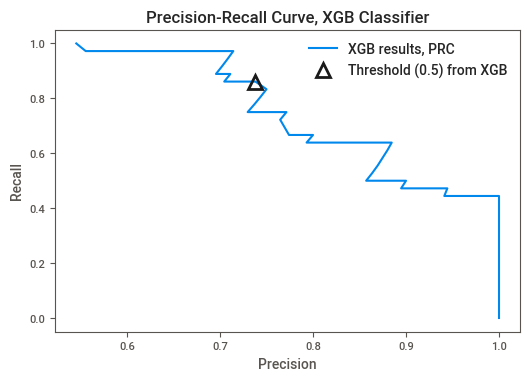

In [60]:
# Taking a look at the Precision-Recall Curve

# Transforming the test data
x_test = best_model_pipeline.best_estimator_[0].transform(x_test)
x_test = best_model_pipeline.best_estimator_[1].transform(x_test)

# Plotting the Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, best_model_pipeline.best_estimator_[2].predict_proba(x_test)[:, 1])
closest_to_default = np.argmin(np.abs(thresholds - 0.5))

plt.plot(precision, recall, label="XGB results, PRC")
plt.plot(precision[closest_to_default], recall[closest_to_default], '^', c='k', # Setting the marker
         markersize=10, label="Threshold (0.5) from XGB", fillstyle="none", mew=2)
plt.title("Precision-Recall Curve, XGB Classifier")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

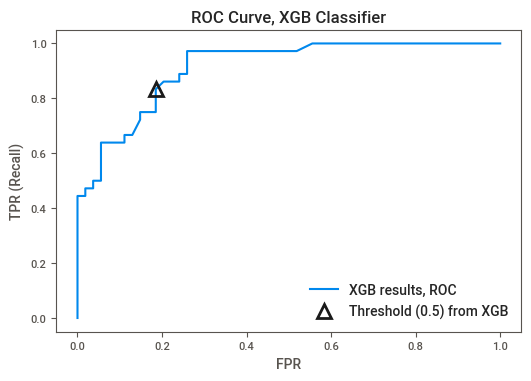

In [61]:
# Taking a look at the ROC Curve

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model_pipeline.best_estimator_[2].predict_proba(x_test)[:, 1])

plt.plot(fpr, tpr, label="XGB results, ROC")
plt.plot(fpr[closest_to_default], tpr[closest_to_default], '^', c='k', # Setting the marker
         markersize=10, label="Threshold (0.5) from XGB", fillstyle="none", mew=2)
plt.title("ROC Curve, XGB Classifier")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.legend(loc="best")

In [62]:
# Visualizing all results and metrics, from all models, obtained by the RandomSearchCV steps
df_results = pd.DataFrame(best_model_pipeline.cv_results_)

display(df_results)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.218293      0.007162         0.000000        0.000000   
1        0.205755      0.007111         0.000000        0.000000   
2        0.198000      0.010987         0.081695        0.006804   
3        0.201330      0.032708         0.102671        0.031774   
4        0.164638      0.014872         0.103899        0.009550   
5        0.252478      0.014383         0.113023        0.008147   
6        0.202161      0.033076         0.091032        0.011884   
7        0.228181      0.019623         0.191813        0.010982   
8        0.288960      0.013139         0.134150        0.014954   
9        0.292416      0.016327         0.000000        0.000000   
10       0.168850      0.019282         0.000000        0.000000   
11       0.174521      0.010158         0.000000        0.000000   
12       0.164074      0.005012         0.080884        0.006069   
13       0.142714      0.004858         0.000000        0.000000   
14       0.163752      0.006970         0.000000        0.000000   
15       0.164923      0.010874         0.000000        0.000000   
16       0.168844      0.005772         0.100853        0.009909   
17       0.166232      0.011666         0.000000        0.000000   
18       0.385615      0.032296         0.090051        0.011637   
19       0.250119      0.011331         0.087572        0.009891   
20       0.211441      0.006755         0.095313        0.019738   
21       0.245660      0.009366         0.102612        0.011392   
22       0.187460      0.009048         0.091681        0.010342   
23       0.948388      0.123044         0.390009        0.062348   
24       0.532191      0.042560         0.136177        0.017304   
25       0.393225      0.025757         0.584390        0.027079   
26       0.187550      0.011522         0.000000        0.000000   
27       0.183933      0.023912         0.090299        0.012649   
28       0.314136      0.007096         0.095701        0.004502   
29       0.149953      0.005190         0.000000        0.000000   
30       0.162233      0.007707         0.084611        0.006492   
31       0.193316      0.019115         0.000000        0.000000   
32       0.178846      0.009863         0.000000        0.000000   
33       0.179054      0.011409         0.089738        0.007960   
34       0.200891      0.010754         0.089763        0.006480   
35       0.272405      0.020999         0.096868        0.016968   
36       0.174521      0.011637         0.000000        0.000000   
37       0.373255      0.021458         0.500727        0.046996   
38       0.207757      0.010269         0.094960        0.011337   
39       0.186790      0.013371         0.000000        0.000000   
40       0.195231      0.009872         0.000000        0.000000   
41       0.171005      0.008478         0.107451        0.019455   
42       0.162105      0.008626         0.000000        0.000000   
43       0.214237      0.023177         0.099716        0.013933   
44       0.222755      0.018063         0.101662        0.013303   
45       0.199080      0.022586         0.000000        0.000000   
46       0.201657      0.015120         0.000000        0.000000   
47       0.209818      0.019942         0.116579        0.013576   
48       0.195209      0.016294         0.106913        0.009034   
49       0.221171      0.019522         0.000000        0.000000   

                                            param_clf  \
0                            RandomForestClassifier()   
1                            RandomForestClassifier()   
2   XGBClassifier(base_score=None, booster=None, c...   
3                                               SVC()   
4                              KNeighborsClassifier()   
5                                               SVC()   
6                            DecisionTreeClassifier()   
7                              KNeighborsClassifier()   
8                     

In [63]:
# Now visualizing all results and metrics obtained only by the best classifier
display(df_results[df_results['rank_test_accuracy'] == 1])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19       0.250119      0.011331         0.087572        0.009891   

                                            param_clf param_clf__max_depth  \
19  XGBClassifier(base_score=None, booster=None, c...                 None   

   param_clf__max_features param_clf__n_estimators param_clf__random_state  \
19                     NaN                      96                     NaN   

                           param_data_transformations  ...  \
19  ColumnTransformer(transformers=[('num',\n     ...  ...   

   split3_test_average_precision split4_test_average_precision  \
19                      0.852463                      0.791455   

   split5_test_average_precision split6_test_average_precision  \
19                      0.875975                      0.803357   

   split7_test_average_precision split8_test_average_precision  \
19                      0.819841                      0.854845   

   split9_test_average_precision mean_test_average_precision  \
19                       0.84518                    0.829942   

   std_test_average_precision rank_test_average_precision  
19                   0.029436                           1  

[1 rows x 98 columns]

###### Plotting Feature Importances

If we want to, it's also possible to check the feature importances of the best model, in case they're easy to understand and explain.

Just remember that, if the best pipeline found in RandomSearchCV applies dimensionality reduction or creates new features using PolynomialFeatures, it will be much harder to explain importances.

In a scenario that no transformations are applied to the features inside the pipeline, if the model is tree-based (RandomForestClassifier, for example), or linear regression-based (Logistic Regression, for example), then explaining most important features becomes much easier.


In [64]:
# Here, we access the categorical feature names generated by OneHotEncoder, and then concatenate them
# with the numerical feature names, in the same order our pipeline is applying data transformations.
categorical_features_after_onehot = best_model_pipeline.best_estimator_.named_steps['data_transformations']\
                                            .transformers_[1][1].named_steps['onehot'].get_feature_names()

feature_names_in_order = numeric_columns + categorical_features_after_onehot

print(feature_names_in_order)

# In case our pipeline uses a feature selection technique (SelectPercentile or SelectFromModel), 
# let's take a look at which features were chosen by it's object:
print("\nFeatures chosen by SelectPercentile:", best_model_pipeline.best_estimator_.named_steps['feature_transf'].get_support())

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', '0_male', '0_female', '1_S', '1_Q', '1_C', '2_young', '2_seniors', '2_adults', '3_small', '3_medium', '3_big', '4_no', '4_yes']

Features chosen by SelectPercentile: [ True False False  True  True  True  True  True False  True  True False
  True  True False  True  True  True]


In [65]:
# To have a better view of what's happening, let's put all OneHotEncoded features into a pandas dataframe
df_all_features = pd.DataFrame(feature_names_in_order, columns=["Features"])


# And then, create a column in this dataframe that tells us if the specific feature was chosen by the selector
df_all_features['ChosenBySelectPercentileOrNot'] = best_model_pipeline.best_estimator_.named_steps['feature_transf'].get_support()

display(df_all_features)

Features  ChosenBySelectPercentileOrNot
0      Pclass                           True
1         Age                          False
2       SibSp                          False
3       Parch                           True
4        Fare                           True
5      0_male                           True
6    0_female                           True
7         1_S                           True
8         1_Q                          False
9         1_C                           True
10    2_young                           True
11  2_seniors                          False
12   2_adults                           True
13    3_small                           True
14   3_medium                          False
15      3_big                           True
16       4_no                           True
17      4_yes                           True

In [66]:
# Now, we visualize only the features that were selected by SelectPercentile object
df_features_chosen = df_all_features[df_all_features['ChosenBySelectPercentileOrNot'] == True]

display(df_features_chosen)

Features  ChosenBySelectPercentileOrNot
0     Pclass                           True
3      Parch                           True
4       Fare                           True
5     0_male                           True
6   0_female                           True
7        1_S                           True
9        1_C                           True
10   2_young                           True
12  2_adults                           True
13   3_small                           True
15     3_big                           True
16      4_no                           True
17     4_yes                           True


#---------------- Bar plot with feature importances ----------------#


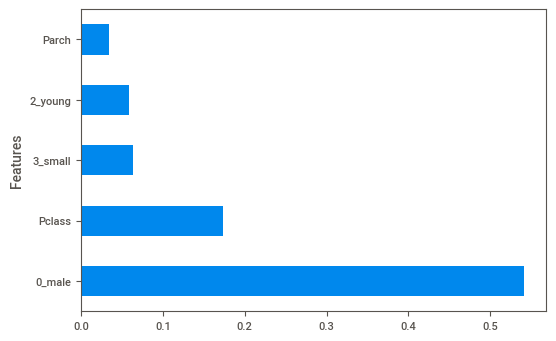

In [67]:
################################################################################################################
## Remember: "index" parameter will not be "feature_names_in_order" if a feature selection technique is used. ##
## In this case, you need to pass the values inside df_features_chosen['Features'] to this parameter.         ##
################################################################################################################



# Plotting feature importances of the best model, if tree-based (top 5 features)
print("\n#---------------- Bar plot with feature importances ----------------#")
feat_importances = pd.Series(best_model_pipeline.best_estimator_.named_steps['clf'].feature_importances_, index=df_features_chosen['Features'])
feat_importances.nlargest(5).plot(kind='barh')
# Use this if feature selection techniques are not used by the pipeline:
#feat_importances = pd.Series(best_model_pipeline.best_estimator_.named_steps['clf'].feature_importances_, index=feature_names_in_order)
#feat_importances.nlargest(5).plot(kind='barh')

###### Predictions

Now that we have tried different preprocessing and modeling techniques, resulting in a final best pipeline, let's use it to predict the test data

Remember: All transformations that were done in the training dataset must be done in the test set.